<h1>Frammingham Data Analysis</h1>
<h2>Project By: Nityanand Wachche & Abhishek Surve</h2>
            

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import scipy.stats as stats
import io
filename = "C:/Users/surve/Desktop/Code files/Final Project/FraminghamData.csv"
df = pd.read_csv(filename, sep=',', decimal='.',header = 0)

In [4]:
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,7081702,2,214,50,115.0,66.0,0,0,22.7,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
1,4266491,1,187,51,134.0,94.0,0,0,28.9,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
2,2407080,1,311,57,183.0,105.0,1,20,31.9,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
3,6153879,2,124,65,114.0,64.0,0,0,23.1,0,...,0,0,5579,5579,5579,5579,5579,5579,5579,5579
4,7611382,1,328,54,162.0,96.0,0,0,23.8,0,...,1,1,8766,1562,1562,1562,8766,1562,8766,0


In [5]:
print(df.shape)

(3234, 35)


In [6]:
#df['LDLC']=pd.to_numeric(df['LDLC'],errors='coerce')

In [7]:
#df['HDLC']=pd.to_numeric(df['HDLC'],errors='coerce')

To get the data type of all varaibles

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 35 columns):
RANDID      3234 non-null int64
SEX         3234 non-null int64
TOTCHOL     3234 non-null int64
AGE         3234 non-null int64
SYSBP       3234 non-null float64
DIABP       3234 non-null float64
CURSMOKE    3234 non-null int64
CIGPDAY     3234 non-null int64
BMI         3234 non-null float64
DIAB        3234 non-null int64
PREVCHD     3234 non-null int64
PREVAP      3234 non-null int64
PREVMI      3234 non-null int64
PREVSTRK    3234 non-null int64
PREVHYP     3234 non-null int64
TIME        3234 non-null int64
PERIOD      3234 non-null int64
HDLC        3234 non-null int64
LDLC        3234 non-null int64
DEATH       3234 non-null int64
ANGINA      3234 non-null int64
HOSPMI      3234 non-null int64
MI_FCHD     3234 non-null int64
ANYCHD      3234 non-null int64
STROKE      3234 non-null int64
CVD         3234 non-null int64
HYPERTEN    3234 non-null int64
TIMEAP      3234 non-nu

Part 1 :
Calculate the means of LDL and HDL values for the two groups:
people with CVD and people without CVD

In [9]:
print(df.shape)

(3234, 35)


Sorting data with no CVD

In [10]:
d0=df.query("CVD=='0'")
d0.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,7081702,2,214,50,115.0,66.0,0,0,22.7,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
1,4266491,1,187,51,134.0,94.0,0,0,28.9,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
2,2407080,1,311,57,183.0,105.0,1,20,31.9,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
3,6153879,2,124,65,114.0,64.0,0,0,23.1,0,...,0,0,5579,5579,5579,5579,5579,5579,5579,5579
5,3594337,2,174,54,141.0,83.0,0,0,20.6,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,2933


In [11]:
print(d0.shape)

(2497, 35)


Mean for LDLC with CVD=0

In [12]:
d0_LDLC=d0['LDLC'].mean()
d0_LDLC

175.27873448137765

Mean for HDLC with CVD=0

In [13]:
d0_HDLC=d0['HDLC'].mean()
d0_HDLC

50.531037244693636

Sorting data with CVD

In [14]:
d1=df.query("CVD=='1'")
d1.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
4,7611382,1,328,54,162.0,96.0,0,0,23.8,0,...,1,1,8766,1562,1562,1562,8766,1562,8766,0
6,6874151,2,177,69,148.0,66.0,1,18,24.6,0,...,1,1,3310,5496,5496,3310,5495,3310,5496,2942
10,5780943,2,187,62,170.0,90.0,1,10,21.7,0,...,1,1,8766,8766,8766,8766,7811,7811,8766,0
13,2745767,2,216,69,145.0,83.0,0,0,30.0,1,...,1,1,8705,8705,8705,2548,6817,2548,8705,0
14,6581425,1,153,55,162.0,90.0,0,0,22.2,0,...,1,1,8766,8766,8766,8766,5542,5542,8766,0


In [15]:
print(d1.shape)

(737, 35)


Mean for HDLC with CVD=1

In [16]:
d1_HDLC=d1['HDLC'].mean()
d1_HDLC

45.43419267299864

Mean for HDLC with CVD=1

In [17]:
d1_LDLC=d1['LDLC'].mean()
d1_LDLC

180.842605156038

Part 2 :
Null hypothesis is that there is no difference in these two means (average(LDL|CVD=0) and average(LDL|CVD=1)

The alternative hypothesis is that they are indeed different

In [18]:
stats.ttest_ind(d0["LDLC"],d1["LDLC"])

Ttest_indResult(statistic=-2.9454724501720428, pvalue=0.0032476396293384287)

Because the two variances are probably different, we should use the Welch's test

In [19]:
stats.ttest_ind(d0["LDLC"],d1["LDLC"],equal_var=False)

Ttest_indResult(statistic=-2.872579842466775, pvalue=0.0041454400736449957)

As we can see, the p-value is way smaller than 0.05 and
consequently p<α (α =0.05) we reject the null hypothesis 

and 

We have a statistically significant evidence to believe 
that (average(LDL|CVD=0) and average(LDL|CVD=1) are different

Part 3 :
Intresting insights about data

We group AGE in different categories

In [20]:
df['Age_group'] = pd.cut(df.AGE,[40, 50, 60,70,81])
df.Age_group.head()

0    (40, 50]
1    (50, 60]
2    (50, 60]
3    (60, 70]
4    (50, 60]
Name: Age_group, dtype: category
Categories (4, interval[int64]): [(40, 50] < (50, 60] < (60, 70] < (70, 81]]

We group TOTCHOL in different categories

In [21]:
df['Tot_chol'] = pd.cut(df.TOTCHOL, [100,300,500,625])
df.Tot_chol.head()

0    (100, 300]
1    (100, 300]
2    (300, 500]
3    (100, 300]
4    (300, 500]
Name: Tot_chol, dtype: category
Categories (3, interval[int64]): [(100, 300] < (300, 500] < (500, 625]]

We group DIABP in different categories

In [22]:
df['Diab_range'] = pd.cut(df.DIABP, [20, 40, 60,80,100,120,140])
df.Diab_range.head()

0      (60, 80]
1     (80, 100]
2    (100, 120]
3      (60, 80]
4     (80, 100]
Name: Diab_range, dtype: category
Categories (6, interval[int64]): [(20, 40] < (40, 60] < (60, 80] < (80, 100] < (100, 120] < (120, 140]]

Set count1 value as 1

In [23]:
df['count1']=1;

We display counts in pivot table of AGE vs TOTCHOL according to range

In [24]:
pivot_table=df.pivot_table('count1', index='Age_group', columns='Tot_chol', aggfunc='sum')
pivot_table

Tot_chol,"(100, 300]","(300, 500]","(500, 625]"
Age_group,,,
"(40, 50]",319.0,23.0,NaN
"(50, 60]",1294.0,87.0,1.0
"(60, 70]",929.0,81.0,1.0
"(70, 81]",459.0,40.0,NaN


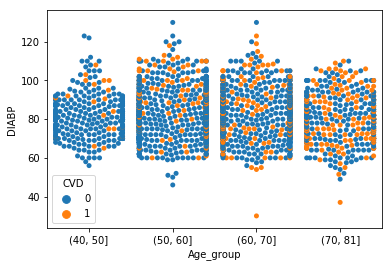

In [134]:
sns.swarmplot(x="Age_group", y="DIABP", hue="CVD", data=df);
plt.show()

Conclusion :As age increases chances of people having CVD increases and range of DIABP expands.

DIABP range is maximum during age 50-70

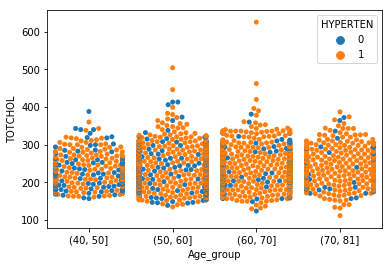

In [138]:
sns.swarmplot(x="Age_group", y="TOTCHOL", hue="HYPERTEN", data=df);
plt.show()

Conclusion: As age increases people become more hypertensive

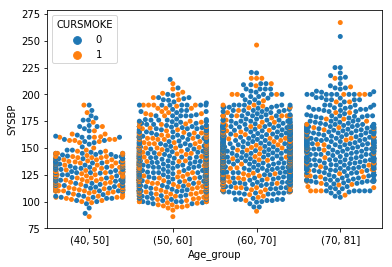

In [137]:
sns.swarmplot(x="Age_group", y="SYSBP", hue="CURSMOKE", data=df);
plt.show()

Conclusion :As age increases CURSMOKE decreases and Systolic blood pressure increases

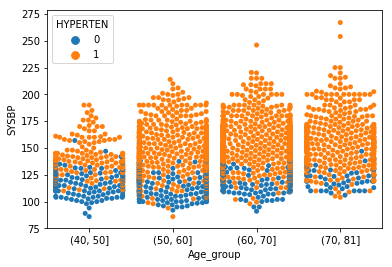

In [139]:
sns.swarmplot(x="Age_group", y="SYSBP", hue="HYPERTEN", data=df);
plt.show()

Conclusion :As age increases systolic blood pressure increases

We find mean of TOTCHOL acc to age group

In [25]:
DD1=df.groupby('Age_group')['TOTCHOL'].mean()
DD1

Age_group
(40, 50]    230.874269
(50, 60]    235.303184
(60, 70]    240.307616
(70, 81]    237.809619
Name: TOTCHOL, dtype: float64

In [26]:
DD2=df[['Age_group','SEX','TOTCHOL']]
DD2.head()

,Age_group,SEX,TOTCHOL
0,"(40, 50]",2,214
1,"(50, 60]",1,187
2,"(50, 60]",1,311
3,"(60, 70]",2,124
4,"(50, 60]",1,328


We display mean of TOTCHOL group by Age group and sex

In [27]:
DD3=DD2.groupby(['Age_group', 'SEX']).mean()
DD3

TOTCHOL
Age_group SEX            
(40, 50]  1    232.980519
          2    229.148936
(50, 60]  1    226.511745
          2    241.969466
(60, 70]  1    225.811594
          2    250.360134
(70, 81]  1    221.331658
          2    248.740000

In [28]:
DD4=df[['Age_group','CVD','DIABP']]
DD4.head()

,Age_group,CVD,DIABP
0,"(40, 50]",0,66.0
1,"(50, 60]",0,94.0
2,"(50, 60]",0,105.0
3,"(60, 70]",0,64.0
4,"(50, 60]",1,96.0


We display mean of DIABP group by Age group and CVD

In [29]:
DD5=DD4.groupby(['Age_group', 'CVD']).mean()
DD5

DIABP
Age_group CVD           
(40, 50]  0    80.888013
          1    85.140000
(50, 60]  0    81.675195
          1    85.965066
(60, 70]  0    81.466621
          1    83.866426
(70, 81]  0    79.863481
          1    80.308252

In [30]:
DD6=df[['Age_group','HOSPMI','DIABP']]
DD6.head()

,Age_group,HOSPMI,DIABP
0,"(40, 50]",0,66.0
1,"(50, 60]",0,94.0
2,"(50, 60]",0,105.0
3,"(60, 70]",0,64.0
4,"(50, 60]",1,96.0


In [31]:
DD7=DD6.groupby(['Age_group', 'HOSPMI']).mean()
DD7

DIABP
Age_group HOSPMI           
(40, 50]  0       80.769350
          1       88.500000
(50, 60]  0       82.163928
          1       85.115385
(60, 70]  0       81.997802
          1       83.262376
(70, 81]  0       80.234234
          1       78.536364

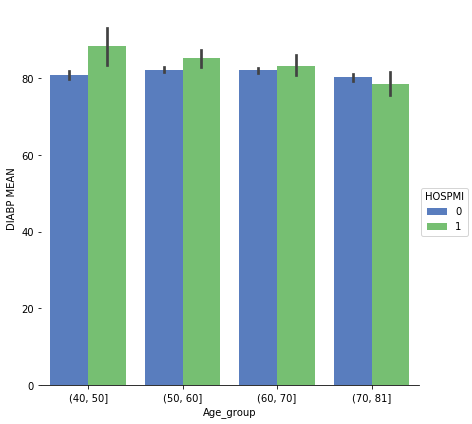

In [34]:
g = sns.factorplot(x="Age_group", y="DIABP", hue="HOSPMI", data=DD6, size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("DIABP MEAN")
plt.show(g)

Conclusion:As age increases DIABP decreases for hospitalized Myocardial infarction occured during followup

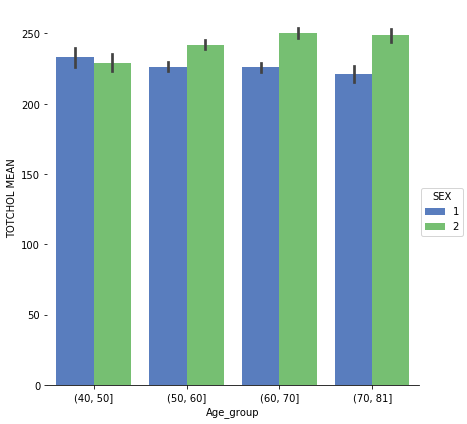

In [37]:
g = sns.factorplot(x="Age_group", y="TOTCHOL", hue="SEX", data=DD2, size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("TOTCHOL MEAN")
plt.show(g)

Conclusion:As age increases DIABP decreases for men and increases for women 

In [39]:
df['Tot_chol'] = pd.cut(df.TOTCHOL, [100,300,500,625])
df.Tot_chol.head()

0    (100, 300]
1    (100, 300]
2    (300, 500]
3    (100, 300]
4    (300, 500]
Name: Tot_chol, dtype: category
Categories (3, interval[int64]): [(100, 300] < (300, 500] < (500, 625]]

In [40]:
DD7=df[['Age_group','BMI','SEX']]
DD7.head()

,Age_group,BMI,SEX
0,"(40, 50]",22.7,2
1,"(50, 60]",28.9,1
2,"(50, 60]",31.9,1
3,"(60, 70]",23.1,2
4,"(50, 60]",23.8,1


In [41]:
DD8=DD7.groupby(['Age_group', 'SEX']).mean()
DD8.head()

BMI
Age_group SEX           
(40, 50]  1    27.206494
          2    24.969149
(50, 60]  1    26.582047
          2    25.573919
(60, 70]  1    25.785990

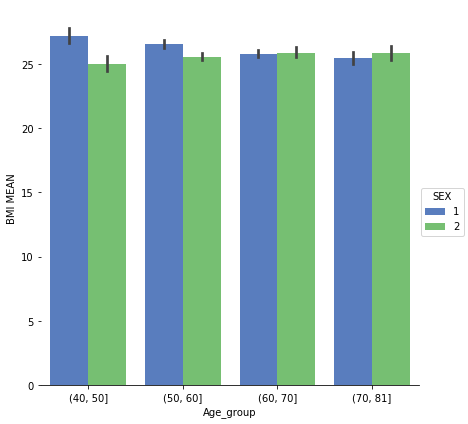

In [42]:
g = sns.factorplot(x="Age_group", y="BMI", hue="SEX", data=DD7, size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("BMI MEAN")
plt.show(g)

Conclusion : As age increases BMI decreseas for Men and increases for Women

Part 3:
Clustering

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [641]:
filename = "/Users/nityanandwachche/Desktop/DWM/Project/FraminghamData.csv"
churnDF = pd.read_csv(filename, sep=',', decimal='.',header = 0)
churnDF.head(10)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,7081702,2,214,50,115.0,66.0,0,0,22.7,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
1,4266491,1,187,51,134.0,94.0,0,0,28.9,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
2,2407080,1,311,57,183.0,105.0,1,20,31.9,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
3,6153879,2,124,65,114.0,64.0,0,0,23.1,0,...,0,0,5579,5579,5579,5579,5579,5579,5579,5579
4,7611382,1,328,54,162.0,96.0,0,0,23.8,0,...,1,1,8766,1562,1562,1562,8766,1562,8766,0
5,3594337,2,174,54,141.0,83.0,0,0,20.6,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,2933
6,6874151,2,177,69,148.0,66.0,1,18,24.6,0,...,1,1,3310,5496,5496,3310,5495,3310,5496,2942
7,9576337,1,171,73,124.0,82.0,0,0,22.7,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
8,9040921,2,137,65,151.0,87.0,0,0,31.6,0,...,0,1,4537,4537,4537,4537,4537,4537,4537,0
9,9471636,2,165,52,120.0,80.0,0,0,21.2,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


We need to copy else you will receive a copy warning when adding the cluster column

In [643]:
trainDF, testDF = train_test_split(churnDF.copy(deep=True), test_size=0.1)
trainDF.head(10)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
1518,6874329,1,216,52,119.0,72.0,1,10,26.1,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
289,3845278,2,174,58,154.0,88.0,0,0,26.7,0,...,1,1,7765,8766,8766,7765,8766,7765,8766,2163
20,3712778,2,154,52,140.0,84.0,0,0,22.9,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,8012
8,9040921,2,137,65,151.0,87.0,0,0,31.6,0,...,0,1,4537,4537,4537,4537,4537,4537,4537,0
697,9595014,2,222,57,132.0,88.0,0,0,30.6,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
1547,9806965,2,228,55,120.0,83.0,1,1,26.8,0,...,0,1,7836,8766,8766,6852,8766,8766,8766,7448
3061,984473,1,237,55,137.0,89.0,1,70,29.0,0,...,1,1,4653,4653,4653,4653,4653,4653,4653,0
3043,8430479,2,237,53,125.0,80.0,0,0,22.0,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,3641
980,5916751,1,243,58,152.0,96.0,0,0,30.6,0,...,0,1,4787,8766,8766,4787,8766,8766,8766,0
1229,6882900,2,233,71,136.0,82.0,1,3,24.8,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,6183


We assume total clusters=4

In [644]:
cluster = KMeans(n_clusters=4)
trainDF["cluster"]=cluster.fit_predict(trainDF)
trainDF.head(10)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,cluster
1518,6874329,1,216,52,119.0,72.0,1,10,26.1,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,1
289,3845278,2,174,58,154.0,88.0,0,0,26.7,0,...,1,7765,8766,8766,7765,8766,7765,8766,2163,2
20,3712778,2,154,52,140.0,84.0,0,0,22.9,0,...,1,8766,8766,8766,8766,8766,8766,8766,8012,2
8,9040921,2,137,65,151.0,87.0,0,0,31.6,0,...,1,4537,4537,4537,4537,4537,4537,4537,0,3
697,9595014,2,222,57,132.0,88.0,0,0,30.6,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,3
1547,9806965,2,228,55,120.0,83.0,1,1,26.8,0,...,1,7836,8766,8766,6852,8766,8766,8766,7448,3
3061,984473,1,237,55,137.0,89.0,1,70,29.0,0,...,1,4653,4653,4653,4653,4653,4653,4653,0,0
3043,8430479,2,237,53,125.0,80.0,0,0,22.0,0,...,1,8766,8766,8766,8766,8766,8766,8766,3641,3
980,5916751,1,243,58,152.0,96.0,0,0,30.6,0,...,1,4787,8766,8766,4787,8766,8766,8766,0,1
1229,6882900,2,233,71,136.0,82.0,1,3,24.8,0,...,1,8766,8766,8766,8766,8766,8766,8766,6183,1


In [645]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(trainDF.drop('cluster', 1))
print (kmeans.labels_)

[1 2 2 ..., 3 2 0]


In [646]:
trainDF["cluster"]=cluster.labels_
trainDF.head(10)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,cluster
1518,6874329,1,216,52,119.0,72.0,1,10,26.1,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,1
289,3845278,2,174,58,154.0,88.0,0,0,26.7,0,...,1,7765,8766,8766,7765,8766,7765,8766,2163,2
20,3712778,2,154,52,140.0,84.0,0,0,22.9,0,...,1,8766,8766,8766,8766,8766,8766,8766,8012,2
8,9040921,2,137,65,151.0,87.0,0,0,31.6,0,...,1,4537,4537,4537,4537,4537,4537,4537,0,3
697,9595014,2,222,57,132.0,88.0,0,0,30.6,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,3
1547,9806965,2,228,55,120.0,83.0,1,1,26.8,0,...,1,7836,8766,8766,6852,8766,8766,8766,7448,3
3061,984473,1,237,55,137.0,89.0,1,70,29.0,0,...,1,4653,4653,4653,4653,4653,4653,4653,0,0
3043,8430479,2,237,53,125.0,80.0,0,0,22.0,0,...,1,8766,8766,8766,8766,8766,8766,8766,3641,3
980,5916751,1,243,58,152.0,96.0,0,0,30.6,0,...,1,4787,8766,8766,4787,8766,8766,8766,0,1
1229,6882900,2,233,71,136.0,82.0,1,3,24.8,0,...,1,8766,8766,8766,8766,8766,8766,8766,6183,1


In [647]:
print (kmeans.cluster_centers_)

[[  1.24090132e+06   1.57887517e+00   2.37722908e+02   6.04663923e+01
    1.40300412e+02   8.22572016e+01   3.63511660e-01   7.12620027e+00
    2.59318244e+01   8.23045267e-02   1.04252401e-01   8.09327846e-02
    3.29218107e-02   1.50891632e-02   6.00823045e-01   4.34647599e+03
    3.00000000e+00   4.92510288e+01   1.77950617e+02   2.27709191e-01
    1.61865569e-01   9.73936900e-02   1.39917695e-01   2.59259259e-01
    7.95610425e-02   2.34567901e-01   7.62688615e-01   7.68680933e+03
    8.07450480e+03   8.04544582e+03   7.48568313e+03   8.14312071e+03
    7.69333745e+03   8.29109053e+03   3.86738409e+03]
 [  6.40452001e+06   1.57200000e+00   2.37734667e+02   6.03666667e+01
    1.40330667e+02   8.14420000e+01   3.52000000e-01   6.91733333e+00
    2.59261333e+01   9.06666667e-02   1.04000000e-01   7.06666667e-02
    4.80000000e-02   3.06666667e-02   6.01333333e-01   4.35449600e+03
    3.00000000e+00   4.94760000e+01   1.76708000e+02   2.40000000e-01
    1.54666667e-01   9.20000000e-02 

In [648]:
trainDF[trainDF.cluster == 1]
trainDF.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,cluster
1518,6874329,1,216,52,119.0,72.0,1,10,26.1,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,1
289,3845278,2,174,58,154.0,88.0,0,0,26.7,0,...,1,7765,8766,8766,7765,8766,7765,8766,2163,2
20,3712778,2,154,52,140.0,84.0,0,0,22.9,0,...,1,8766,8766,8766,8766,8766,8766,8766,8012,2
8,9040921,2,137,65,151.0,87.0,0,0,31.6,0,...,1,4537,4537,4537,4537,4537,4537,4537,0,3
697,9595014,2,222,57,132.0,88.0,0,0,30.6,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,3


In [649]:
testDF.head(10)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
1002,1421322,1,293,64,186.0,101.5,0,0,26.8,0,...,1,1,7633,7633,7633,7633,7633,7633,7633,740
72,8769752,1,204,64,184.0,86.0,0,0,25.7,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,1448
2336,1417341,2,260,75,166.0,74.5,0,0,22.0,0,...,1,1,8513,7323,7323,7323,8513,7323,8513,0
2579,8077792,1,263,67,125.0,75.0,0,0,28.3,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
2438,9967157,1,274,70,130.0,77.0,0,0,25.2,0,...,1,0,3273,6662,6662,3273,7362,3273,7362,7362
2165,769782,2,294,71,120.0,78.0,1,7,19.1,0,...,0,1,392,8215,8215,392,8215,8215,8215,7979
291,5175566,2,189,62,135.0,72.0,0,0,24.1,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
74,3096842,1,170,72,153.0,89.0,0,0,27.8,0,...,0,1,5816,5816,5816,5816,5816,5816,5816,3647
1466,4224625,1,207,54,107.0,62.0,1,20,21.2,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
2588,2560765,2,294,72,155.0,69.0,0,0,25.9,0,...,1,1,8442,8766,8766,7798,8766,7798,8766,0


In [650]:
cValues = kmeans.predict(testDF)
testDF['cluster'] = cValues
testDF.head(10)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIAB,...,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,cluster
1002,1421322,1,293,64,186.0,101.5,0,0,26.8,0,...,1,7633,7633,7633,7633,7633,7633,7633,740,0
72,8769752,1,204,64,184.0,86.0,0,0,25.7,0,...,1,8766,8766,8766,8766,8766,8766,8766,1448,3
2336,1417341,2,260,75,166.0,74.5,0,0,22.0,0,...,1,8513,7323,7323,7323,8513,7323,8513,0,0
2579,8077792,1,263,67,125.0,75.0,0,0,28.3,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,3
2438,9967157,1,274,70,130.0,77.0,0,0,25.2,0,...,0,3273,6662,6662,3273,7362,3273,7362,7362,3
2165,769782,2,294,71,120.0,78.0,1,7,19.1,0,...,1,392,8215,8215,392,8215,8215,8215,7979,0
291,5175566,2,189,62,135.0,72.0,0,0,24.1,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,1
74,3096842,1,170,72,153.0,89.0,0,0,27.8,0,...,1,5816,5816,5816,5816,5816,5816,5816,3647,2
1466,4224625,1,207,54,107.0,62.0,1,20,21.2,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,2
2588,2560765,2,294,72,155.0,69.0,0,0,25.9,0,...,1,8442,8766,8766,7798,8766,7798,8766,0,2


In [651]:
print(kmeans.fit_transform(testDF))

[[   20963.17218634  5423295.87117028  2611796.85024548  7571419.59175562]
 [ 7369201.91678877  1925137.18365049  4736637.61921129   223012.31612829]
 [   17194.82772004  5427277.36053806  2615779.07434865  7575400.93144918]
 ..., 
 [  975810.37164855  4468259.53616725  1656758.38341412  6616383.60499307]
 [ 2980294.42166457  2463794.6021426    347814.32927321  4611912.35112952]
 [  634424.43218875  6078480.40034057  3266981.70201325  8226603.94539439]]


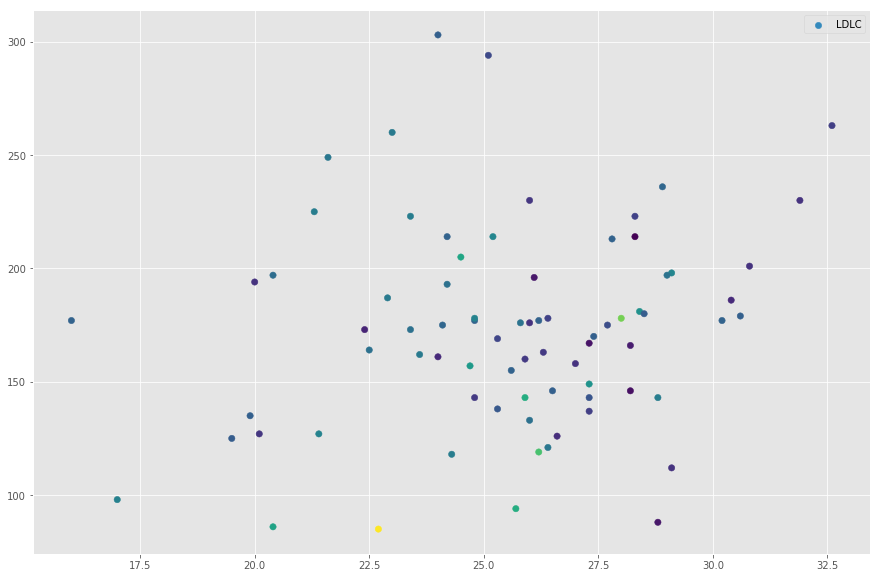

In [652]:
clt1DF=testDF[testDF.cluster == 3]
plt.figure(figsize=(15, 10))
plt.scatter(clt1DF['BMI'],clt1DF['LDLC'],c=clt1DF['HDLC'],s=40)
plt.legend()
plt.show()

Apply the elbow method to find the optimal number of clusters

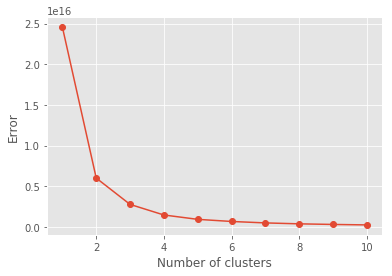

In [653]:
error = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(trainDF.drop('cluster', 1))
    error.append(km.inertia_)
plt.plot(range(1,11), error, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

Applying hierarchical clustering

In [238]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

clusters = linkage(pdist(churnDF, metric='euclidean'), method='complete')

Calculating the distance between elements using distance matrix 

In [654]:
hierarchicalDF = pd.DataFrame(clusters, columns=['label 1','label 2','distance','#Elements'], index=['cluster %d' %(i+1) for i in range(clusters.shape[0])])
hierarchicalDF.head(100)

,label 1,label 2,distance,#Elements
cluster 1,711.0,1088.0,67.219119,2.0
cluster 2,533.0,830.0,88.978705,2.0
cluster 3,1510.0,3179.0,103.796146,2.0
cluster 4,197.0,1890.0,148.561805,2.0
cluster 5,976.0,1862.0,164.845564,2.0
cluster 6,2348.0,2835.0,182.859536,2.0
cluster 7,2094.0,3040.0,217.196777,2.0
cluster 8,1272.0,3128.0,218.981301,2.0
cluster 9,326.0,2017.0,226.208399,2.0
cluster 10,827.0,1947.0,226.343566,2.0


Dendogram 

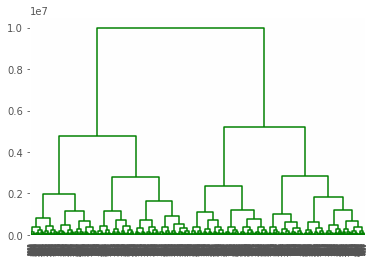

In [655]:
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline

dendrogram = dendrogram(hierarchicalDF, color_threshold=np.inf)